In [1]:
import tensorflow as tf

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.5.0'

#### Session

In [3]:
m1 = tf.constant([[2,2]])
m2 = tf.constant([[3], [3]])

In [4]:
dot_product = tf.matmul(m1, m2)

In [5]:
print(dot_product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


First method of using tensorflow "Session".

In [6]:
sess = tf.Session()
result = sess.run(dot_product)

In [7]:
print(result)

[[12]]


In [8]:
sess.close()

Second method of using tensorflow "Session".

In [9]:
with tf.Session() as sess:
    result2 = sess.run(dot_product)
    print(result2)
# with block autocloses the sessions or operations (python) after its execution.

[[12]]


#### Placeholder

In [10]:
x1 = tf.placeholder(dtype= tf.float32, shape = None)
y1 = tf.placeholder(dtype= tf.float32, shape = None)

z1 = x1 + y1

In [11]:
x2 = tf.placeholder(dtype= tf.float32, shape = [2,1])
y2 = tf.placeholder(dtype= tf.float32, shape= [1,2])

z2 = tf.matmul(x2, y2)

In [12]:
with tf.Session() as sess:
    z1_value = sess.run(z1, # For Single operation using one session.
                        feed_dict= {x1: 1, y1: 2})
    
    z1_value, z2_value = sess.run(
                            [z1, z2], # For multiple operation using one session.
                            feed_dict= {
                                  x1: 1, y1: 2,
                                  x2:[[2], [2]], y2: [[3,3]]
                                 })
    
    print(z1_value)
    print(z2_value)

3.0
[[6. 6.]
 [6. 6.]]


#### Variables

In [13]:
var = tf.Variable(0) # First variable in the global variable set.

In [15]:
add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

In [17]:
with tf.Session() as sess:
    # After declaring variables, initialize them with below line of code.
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


#### Activation functions

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# dummy data
x = np.linspace(-5, 5, num = 200)

In [20]:
x.shape

(200,)

Below is the list of activation functions and their tensorflow APIs.

In [21]:
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

In [22]:
sess = tf.Session()

In [25]:
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

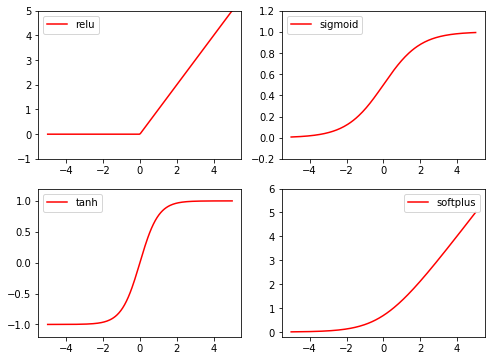

In [26]:
# Visualization plots
plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x, y_relu, c='red', label = 'relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c= 'red', label = 'sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label ='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

In [29]:
sess.close()

#### Simple Regression

In [27]:
tf.set_random_seed(1)
np.random.seed(1)

# Dummy data
x = np.linspace(-1, 1, 100) [:, np.newaxis]
noise = np.random.normal(0, 0.1, size = x.shape)
y = np.power(x,2) + noise

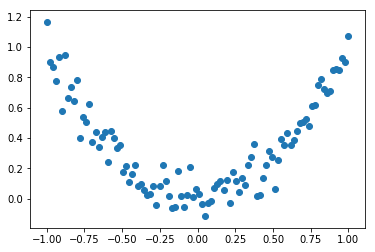

In [28]:
plt.scatter(x,y)
plt.show()

In [32]:
tf_x = tf.placeholder(dtype=tf.float32, shape=x.shape) # input x
tf_y = tf.placeholder(dtype=tf.float32, shape=y.shape) # input y

# Neural Network layers

l1= tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
output = tf.layers.dense(l1, 1)

# Loss function

loss = tf.losses.mean_squared_error(tf_y, output) # Compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session() # Session Creation
sess.run(tf.global_variables_initializer()) # Initialize variable graph


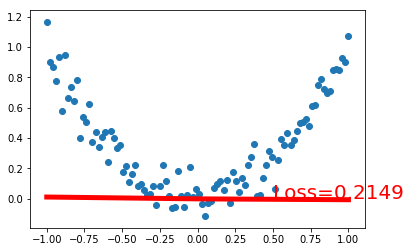

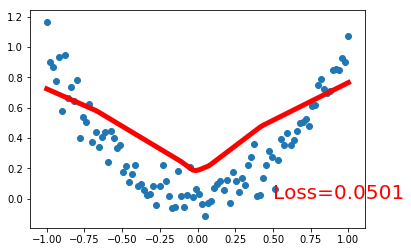

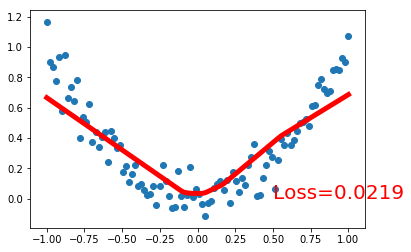

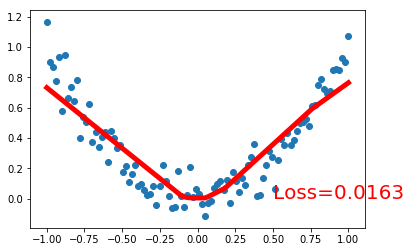

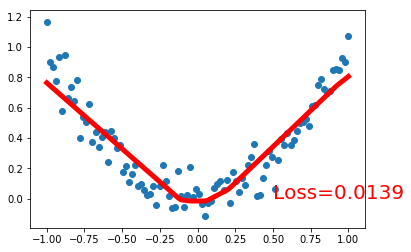

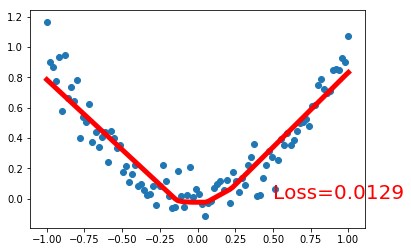

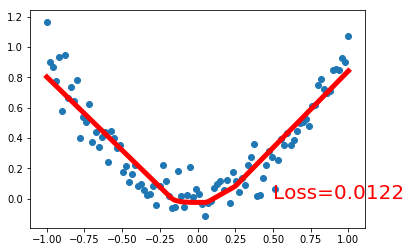

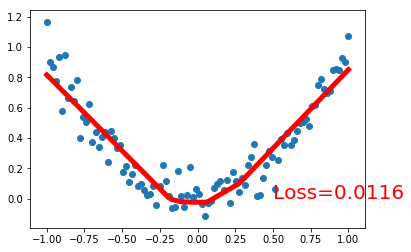

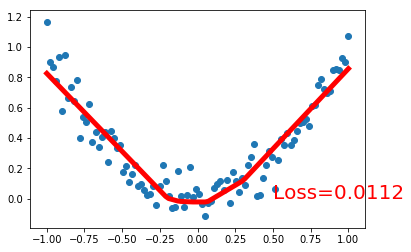

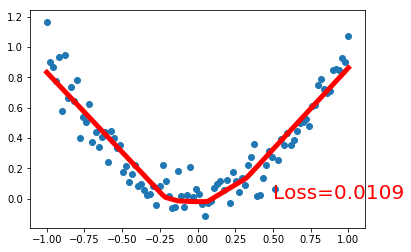

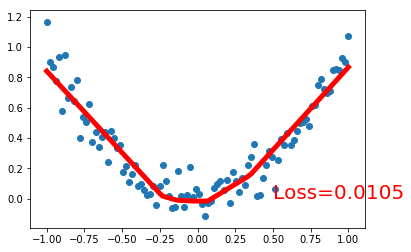

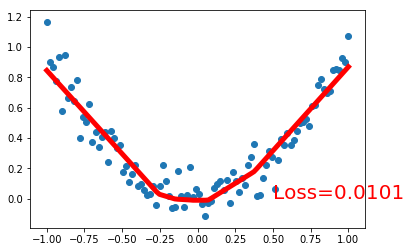

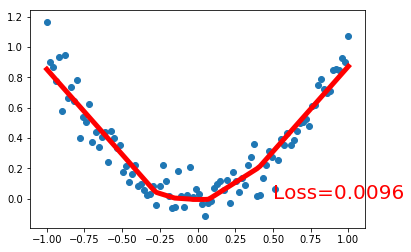

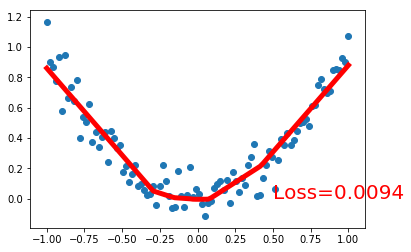

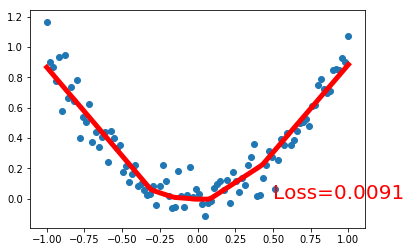

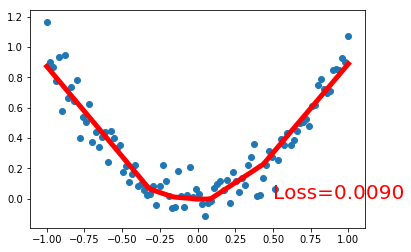

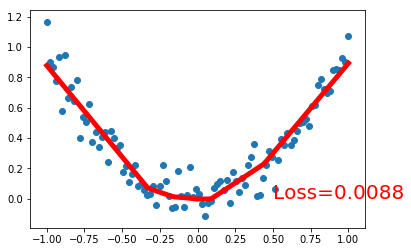

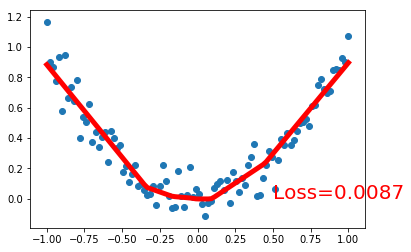

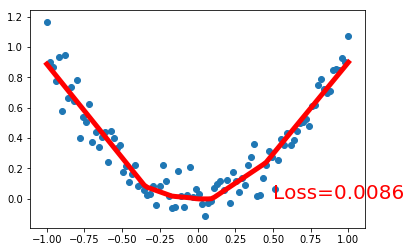

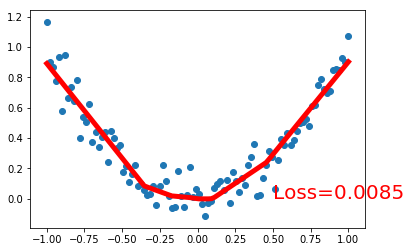

In [33]:
plt.ion()

for step in range(100):
    
    _, l, pred = sess.run([train_op, loss, output], {tf_x:x, tf_y:y})
    
    if step%5==0:
        
        # learning process
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()